Universidad del Valle de Guatemala <br>
08/04/2022 <br>
Minería de Datos # 20 

# Hoja de Trabajo 6
## Regresión logística

**Integrantes:**<br>
Walter Saldaña 19897 <br>
José Gutierrez 19111 <br>
Javier Cotto 19324 <br>

### Importar modulos

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import random
import math
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from scipy import stats
from sklearn.metrics import confusion_matrix as Confusion_Matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Carga de datos

In [2]:
entrenamiento = pd.read_csv('train.csv', encoding='unicode_escape')
entrenamiento.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
prueba = pd.read_csv('test.csv', encoding='unicode_escape')
prueba.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2) Preprocesamiento de los datos.

Remover variables cualitativas que no aportan, ya que no son categóricas, y sus frecuencias no pueden ser clasificadas.

In [4]:
entrenamiento = entrenamiento.drop(['Street', 'Id', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                         'SaleType', 'SaleCondition'], axis=1)

Eliminar filas que contengan datos nulos (NaN).

In [5]:
entrenamiento.dropna(subset = ["LotFrontage"], inplace = True)
entrenamiento.dropna(subset = ["MasVnrArea"], inplace = True)
entrenamiento.dropna(subset = ["GarageYrBlt"], inplace = True)

## Resumen estadístico de las variables

In [6]:
 entrenamiento.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,44.589652,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,157.828725,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


### Normalizacion

In [7]:
def normalizer(column):
    return (column - column.mean())/(column.std())

for col in entrenamiento.columns:
    entrenamiento[col] = normalizer(entrenamiento[col])

## Analisis de Datos

### Eliminacion de datos atipicos

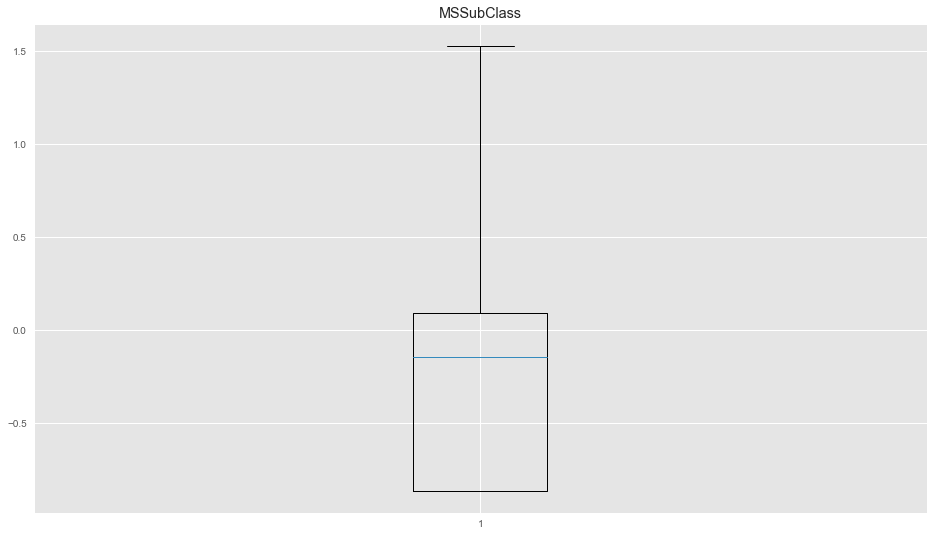

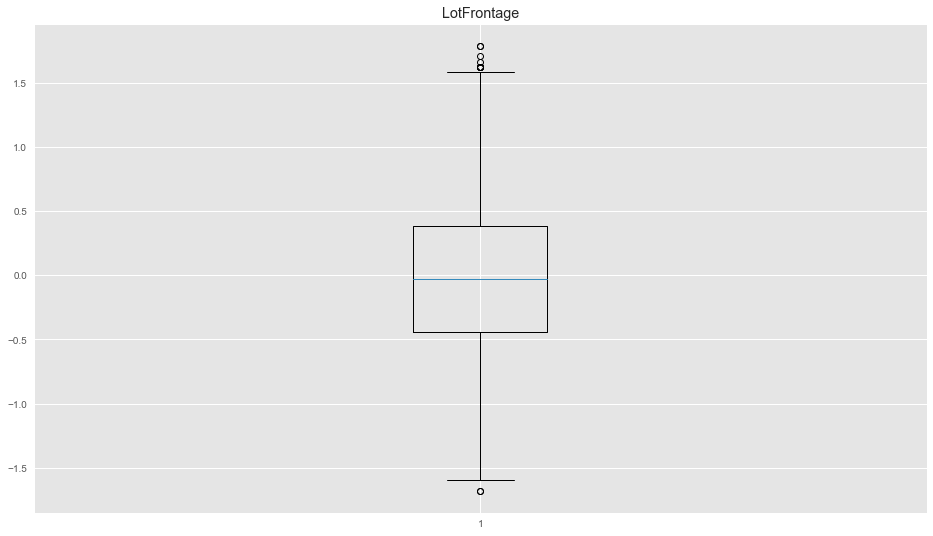

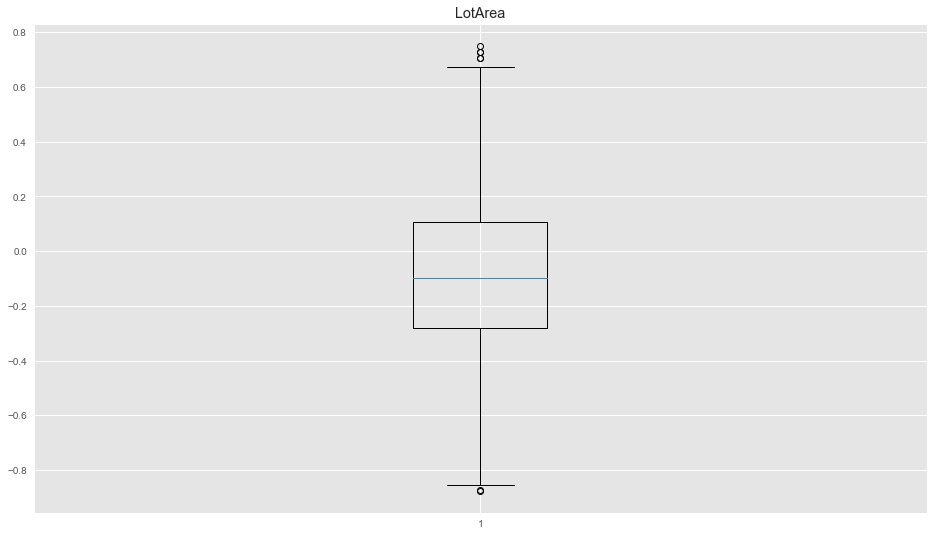

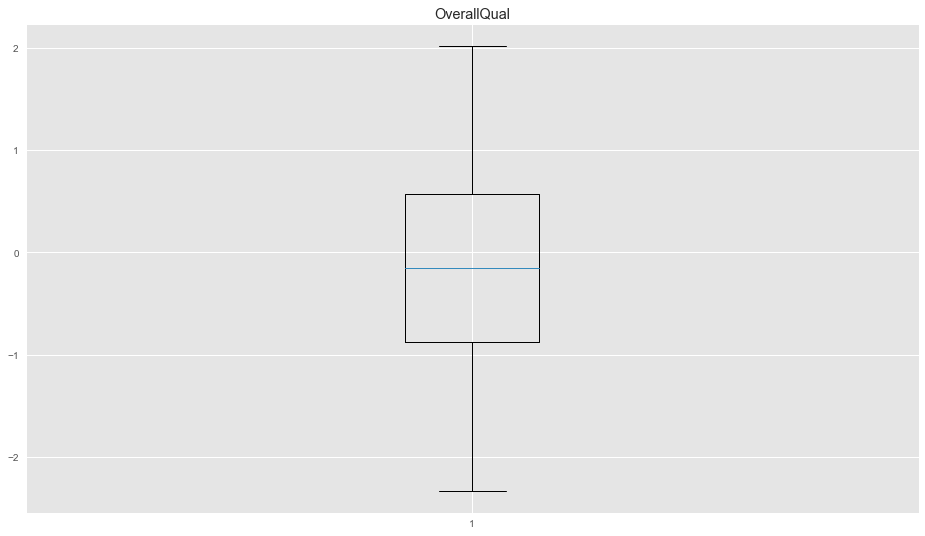

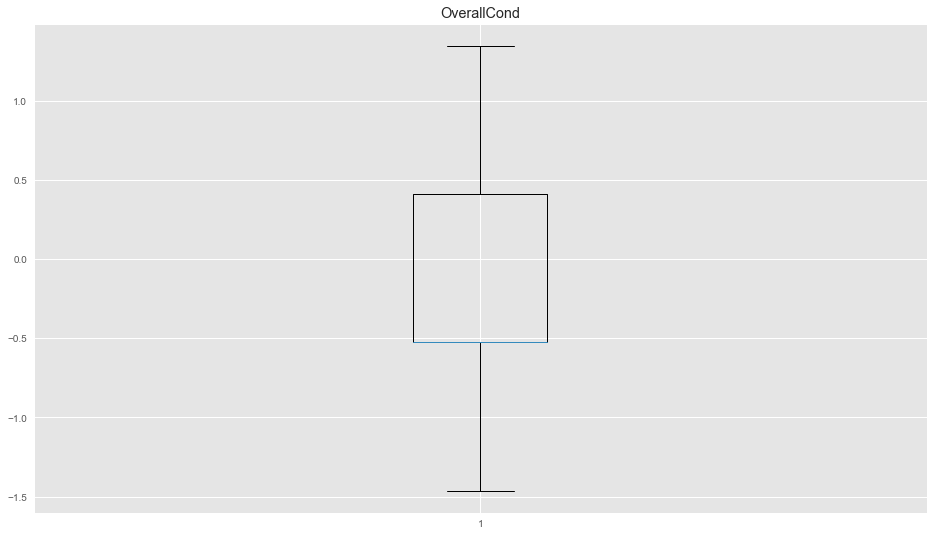

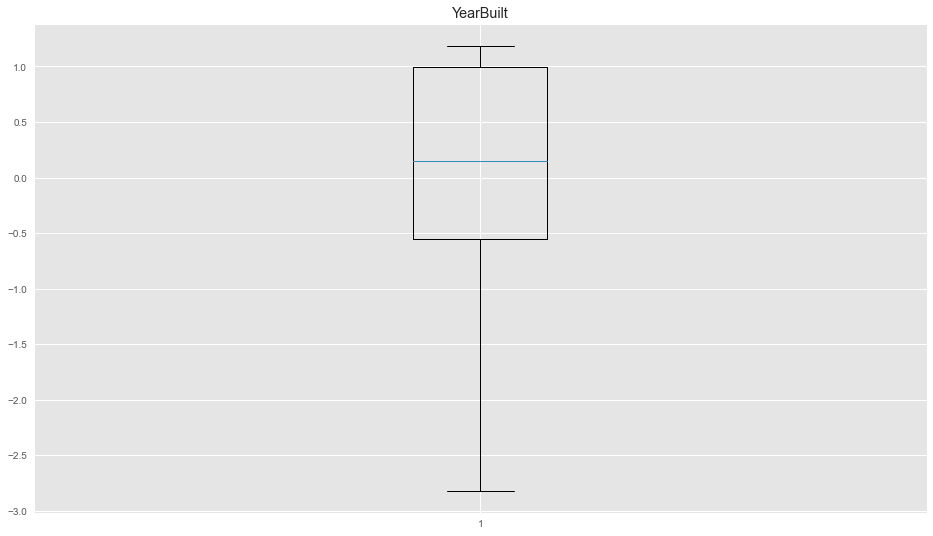

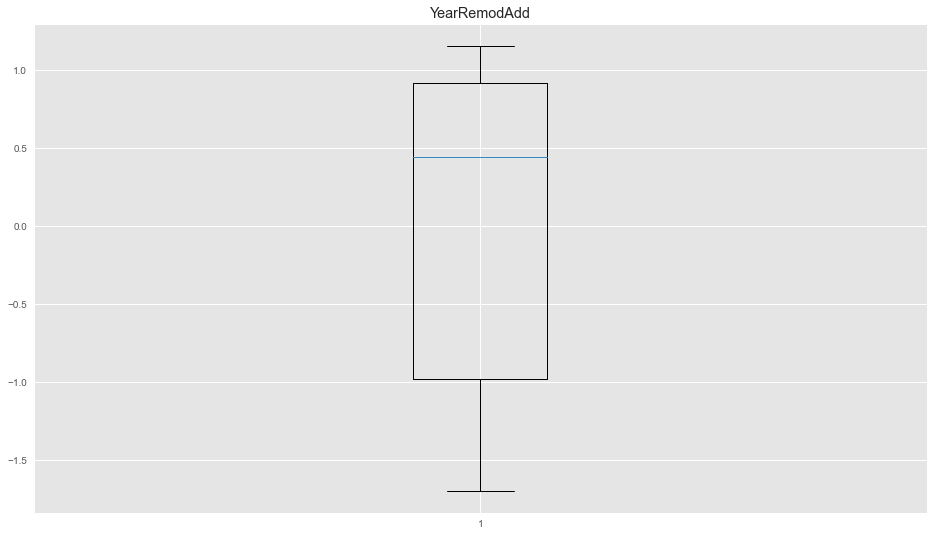

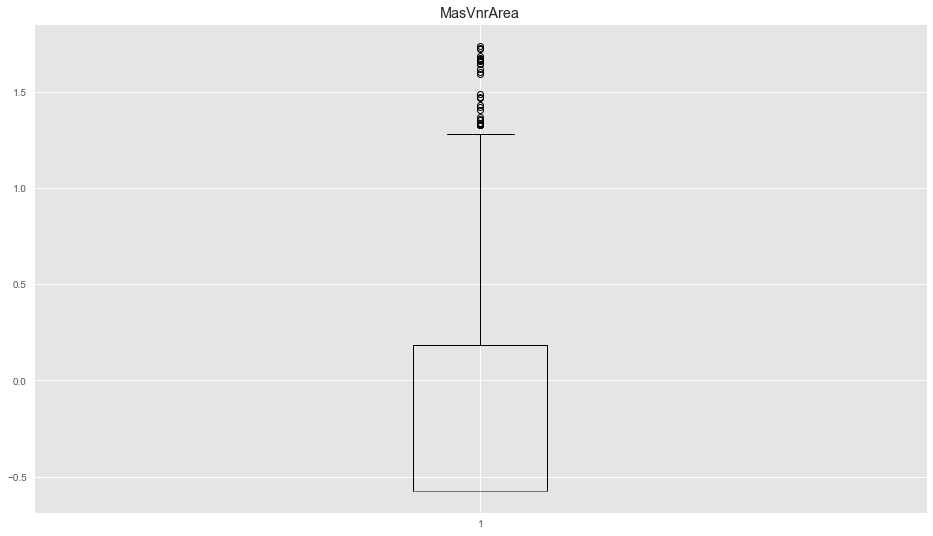

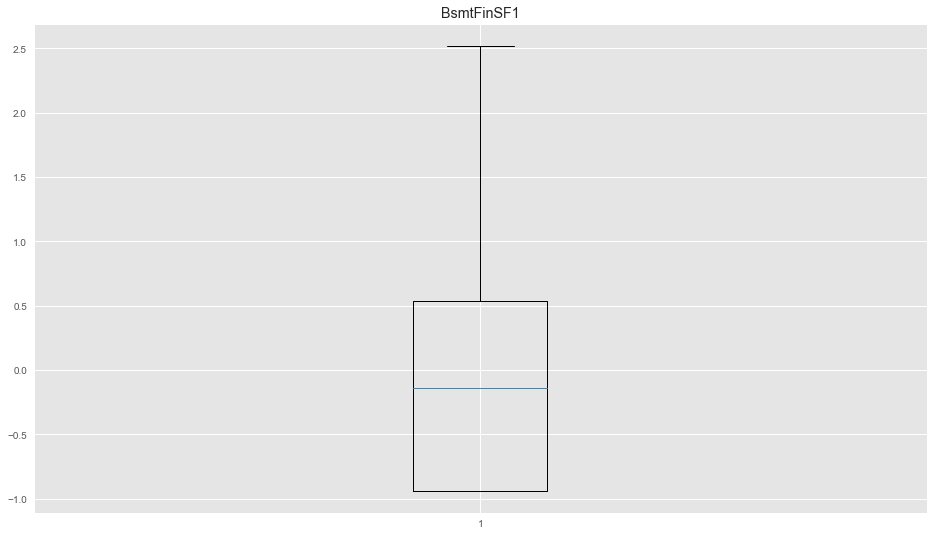

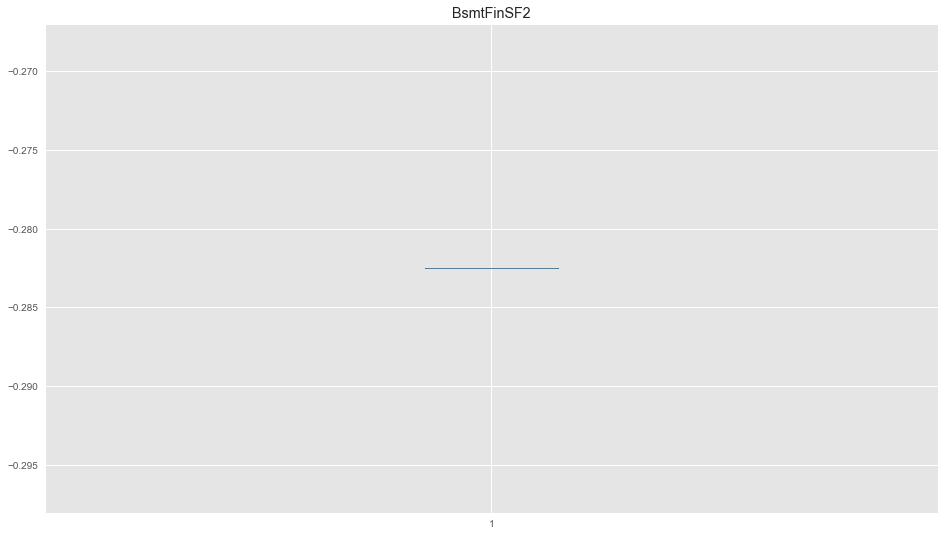

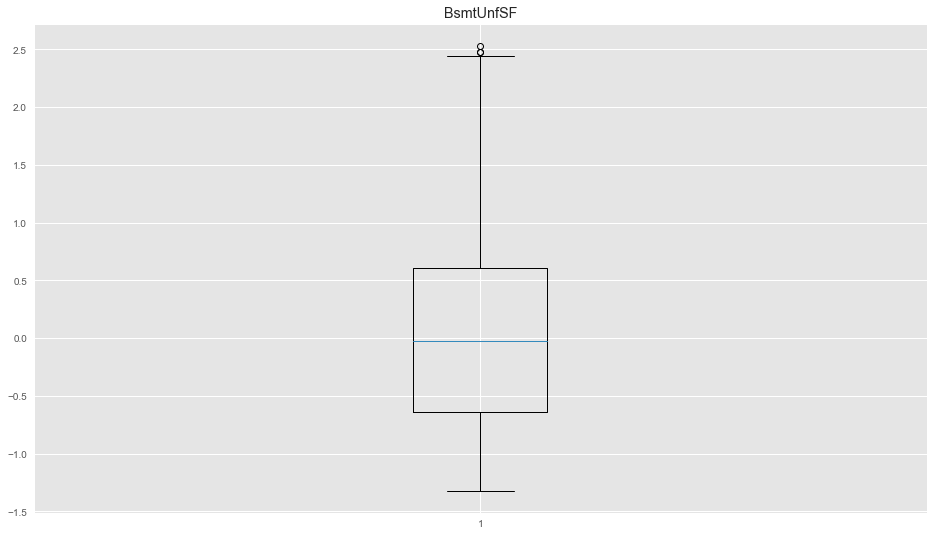

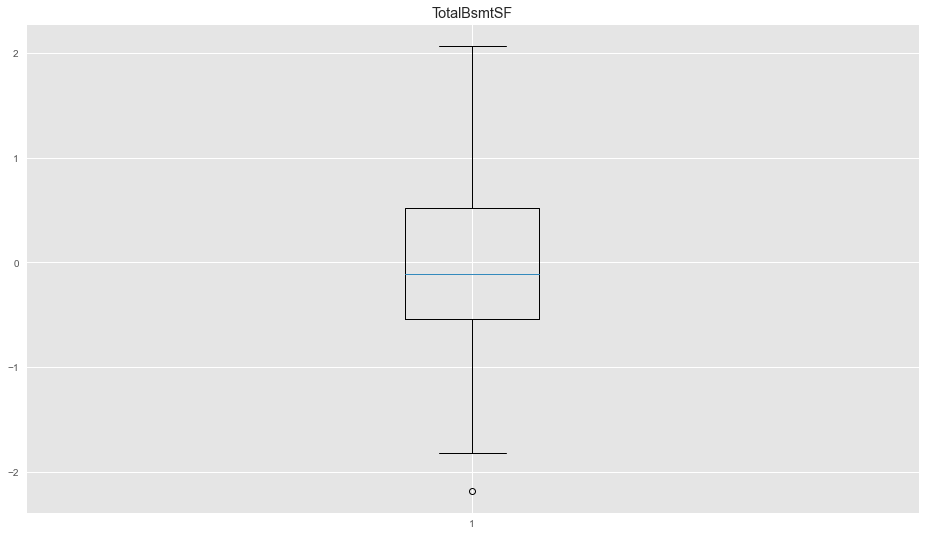

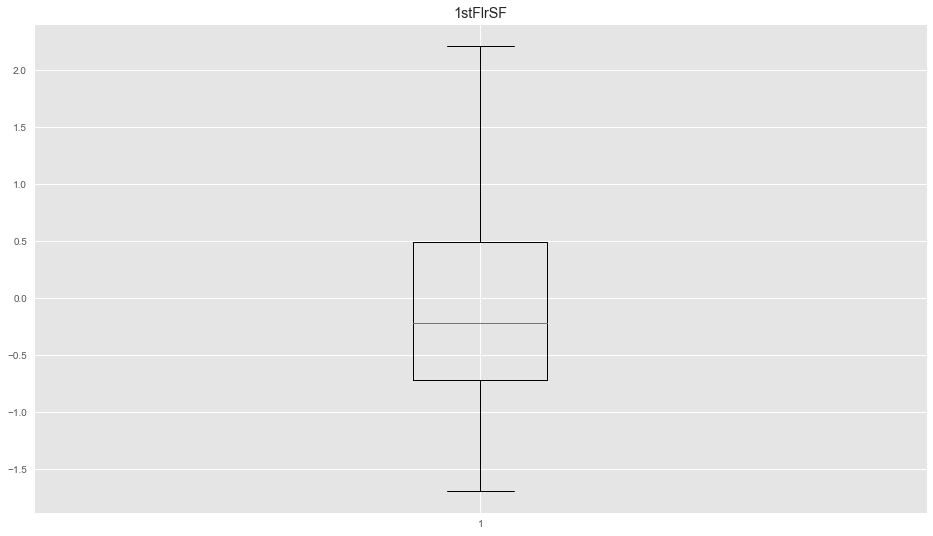

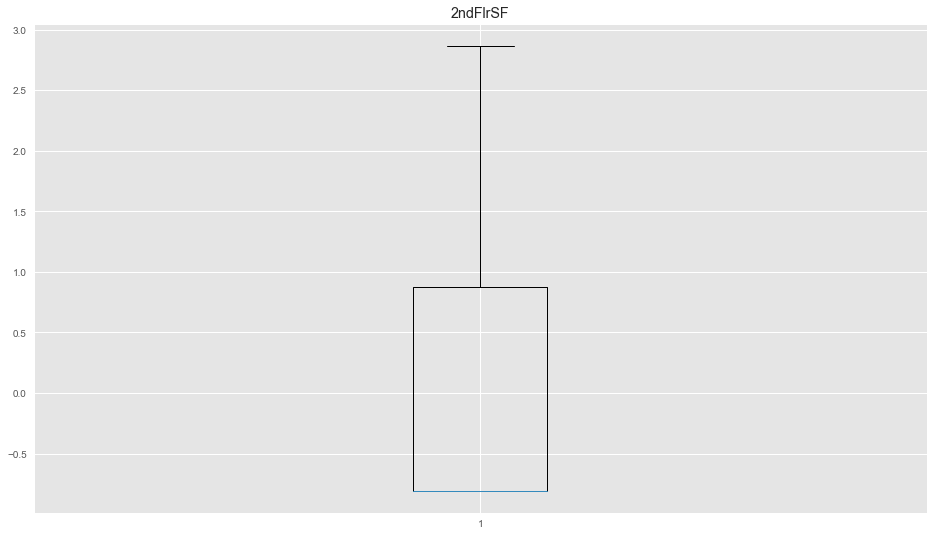

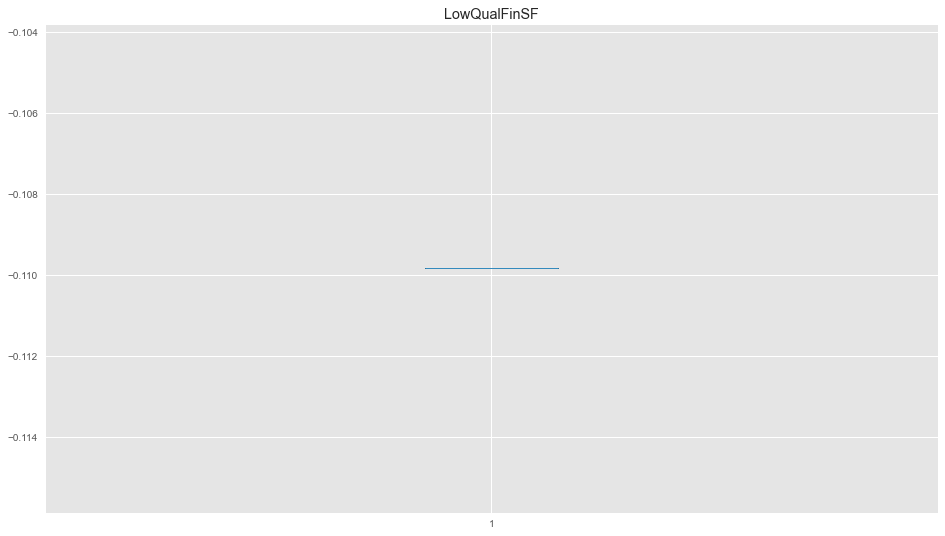

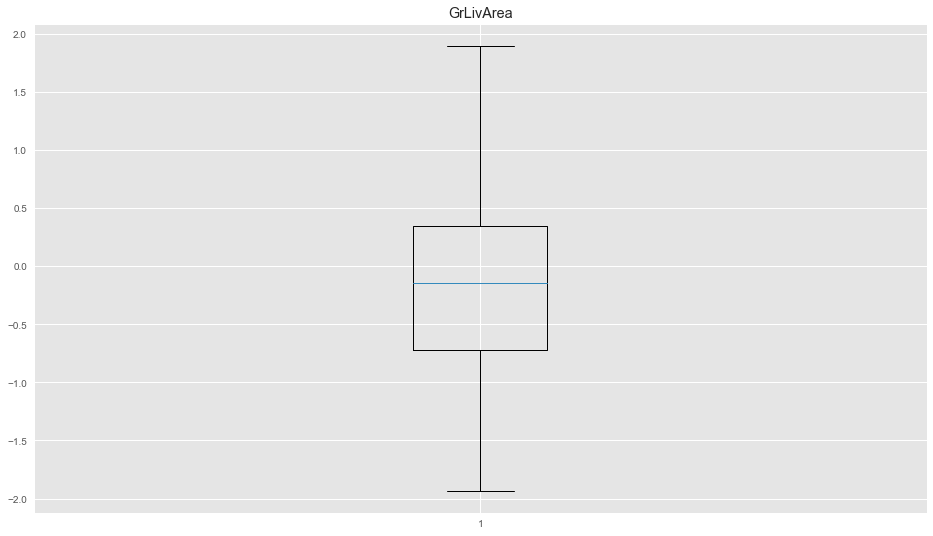

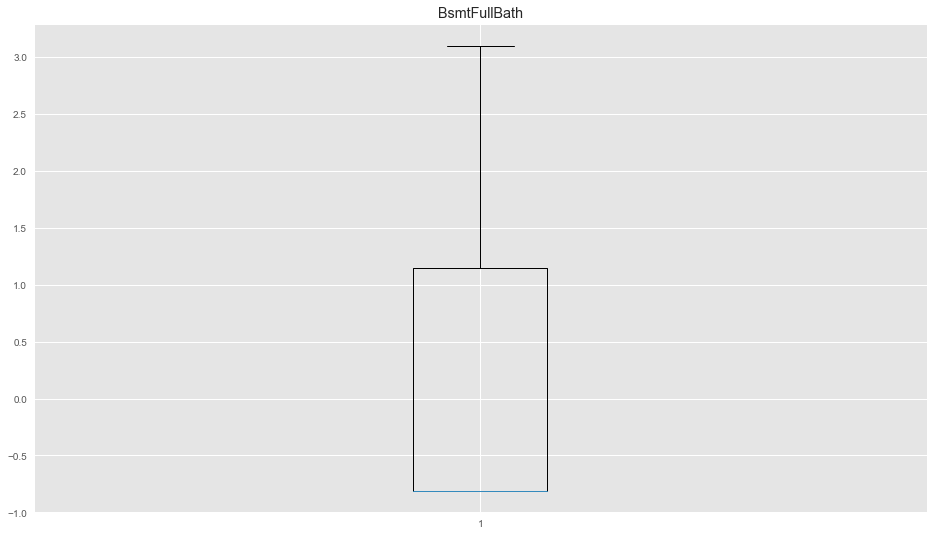

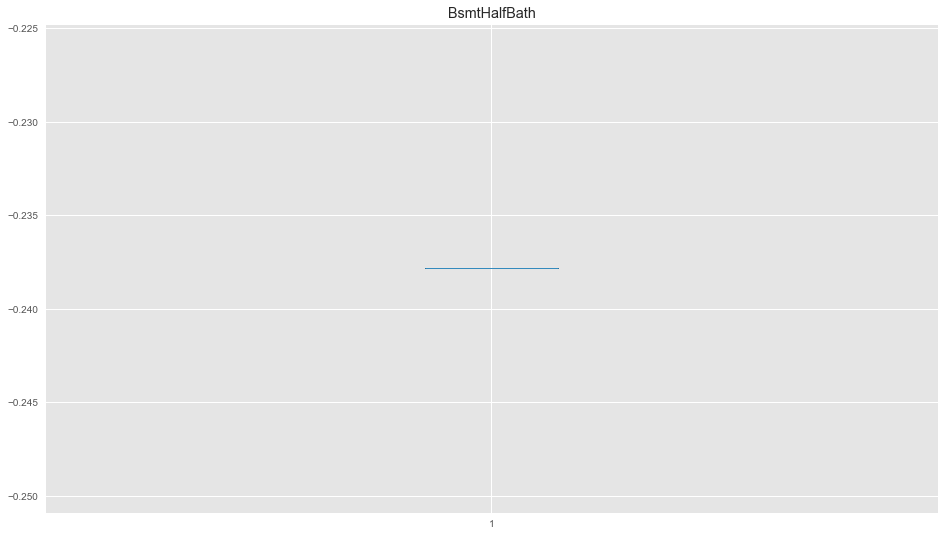

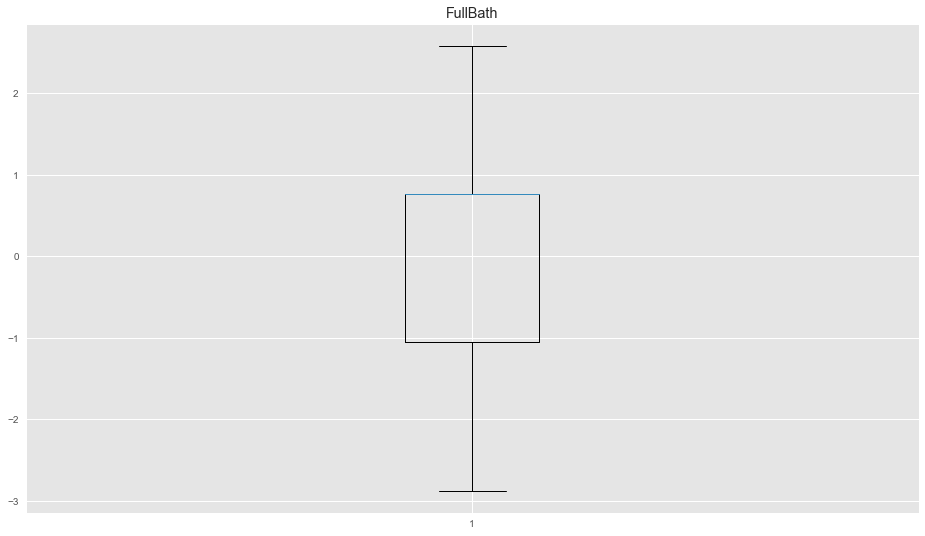

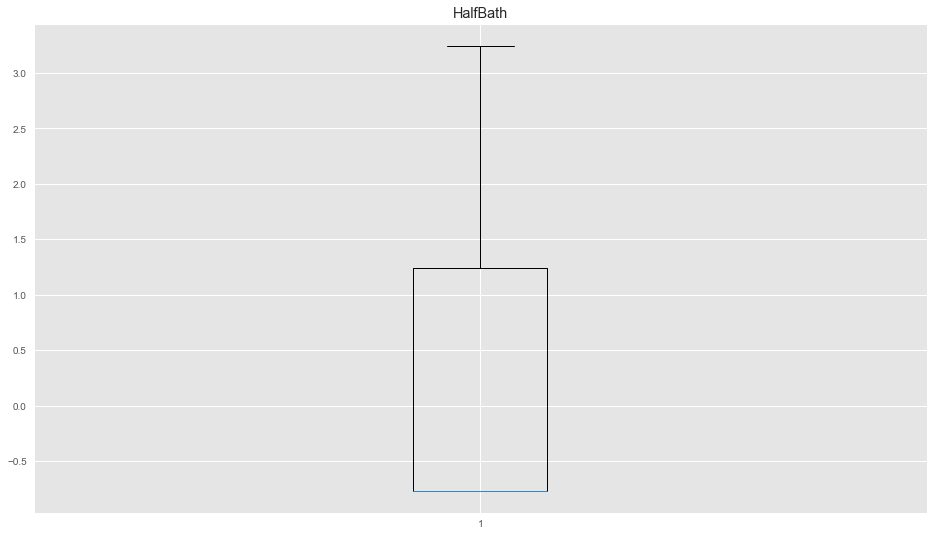

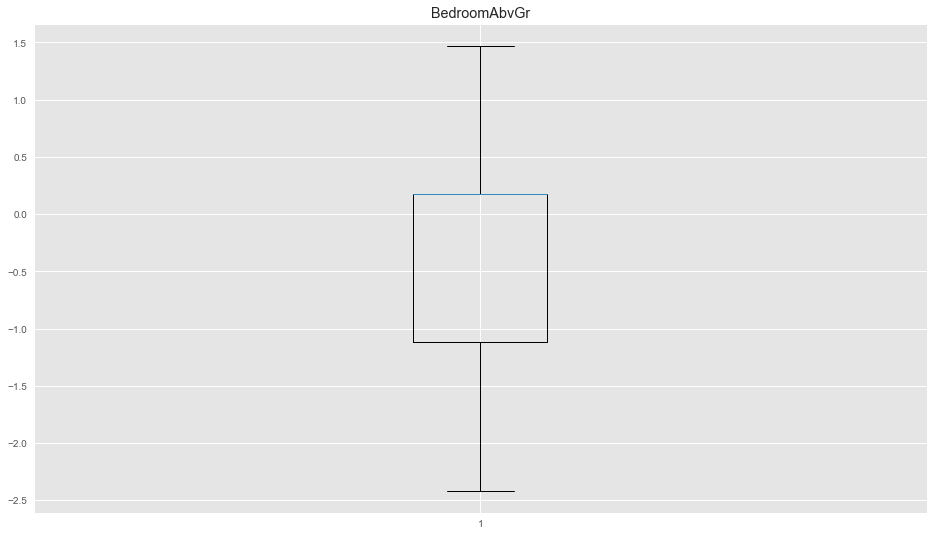

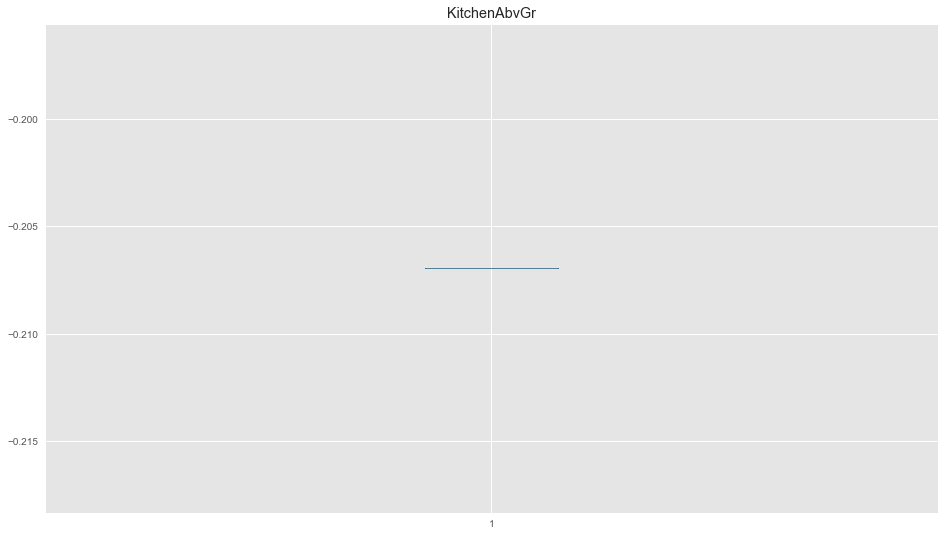

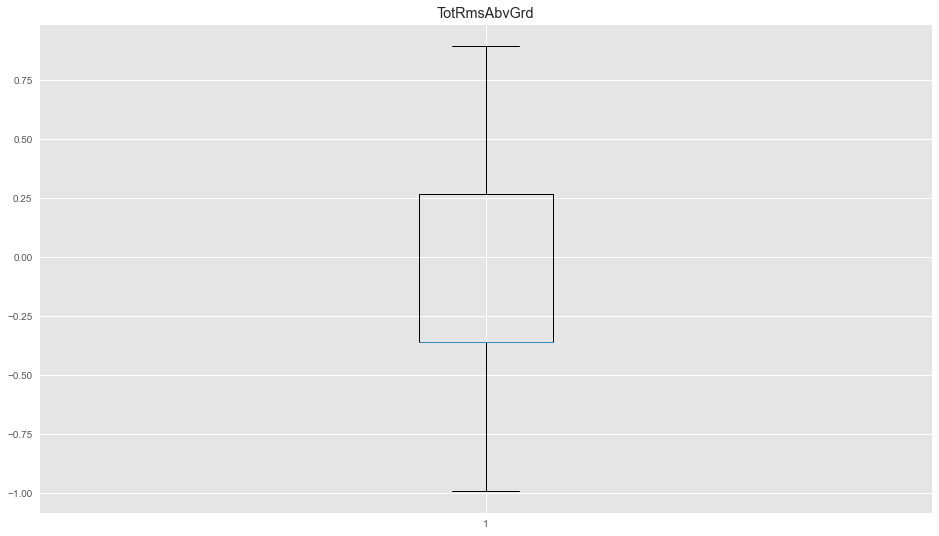

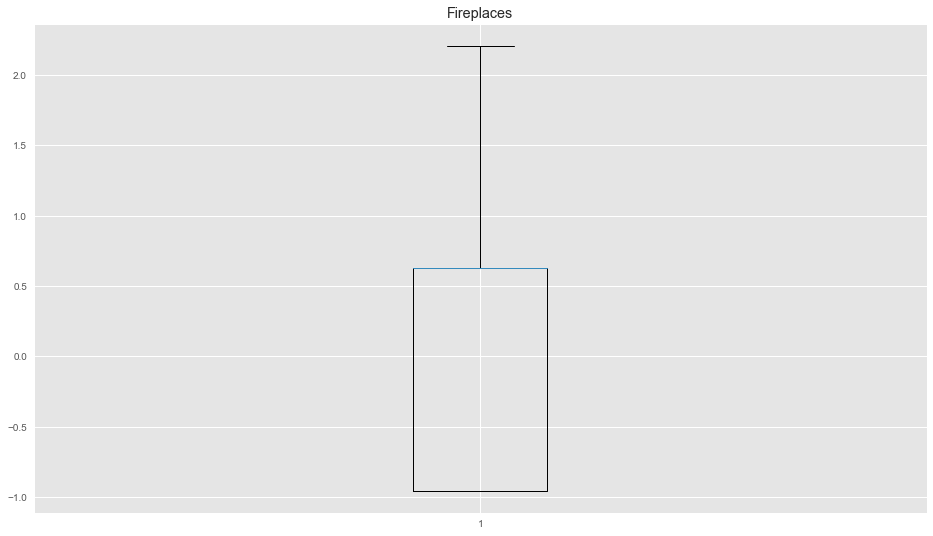

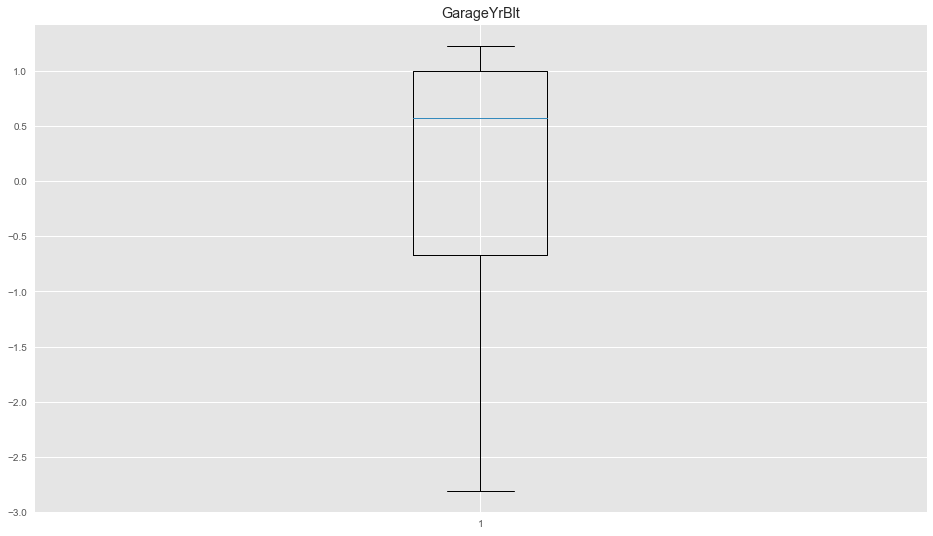

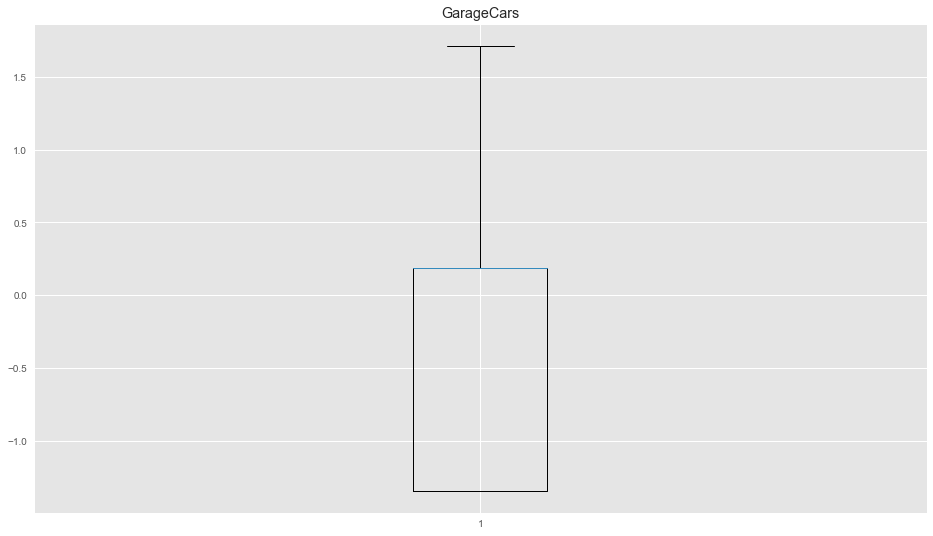

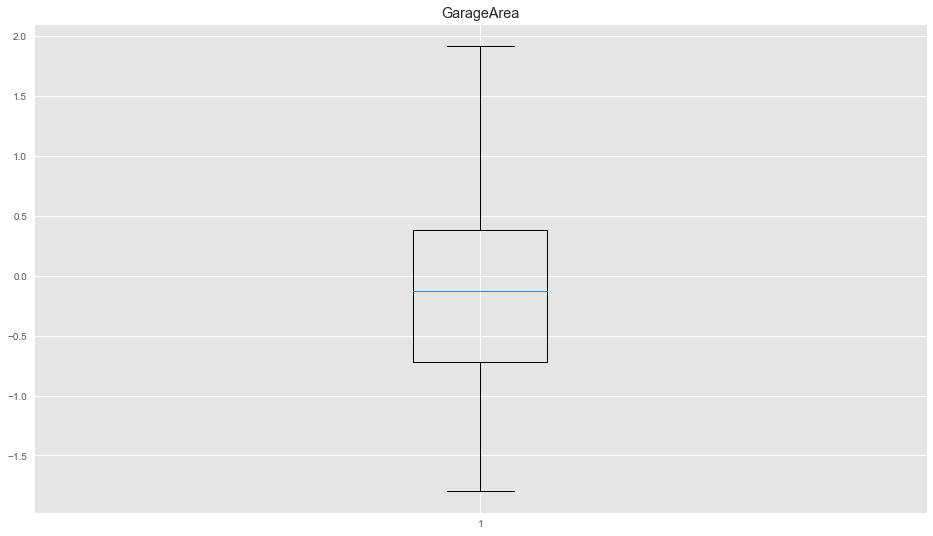

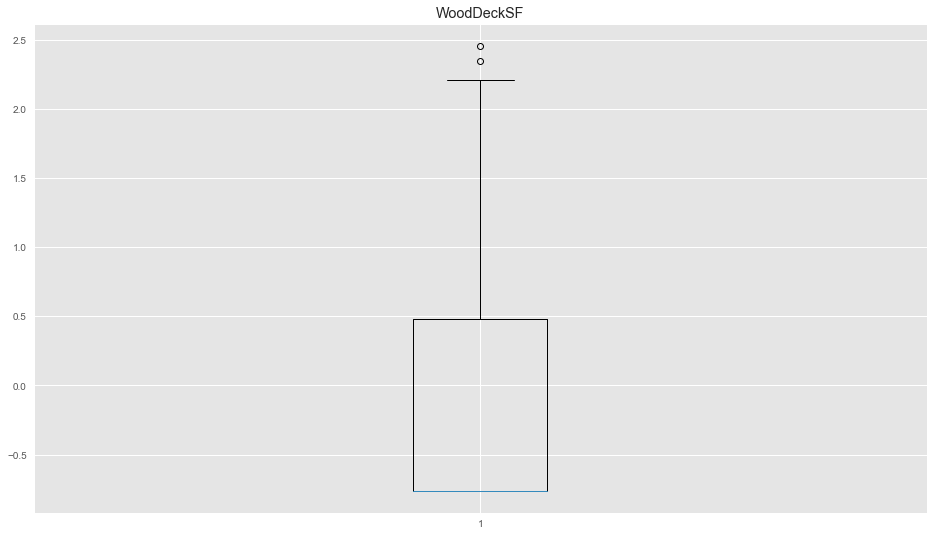

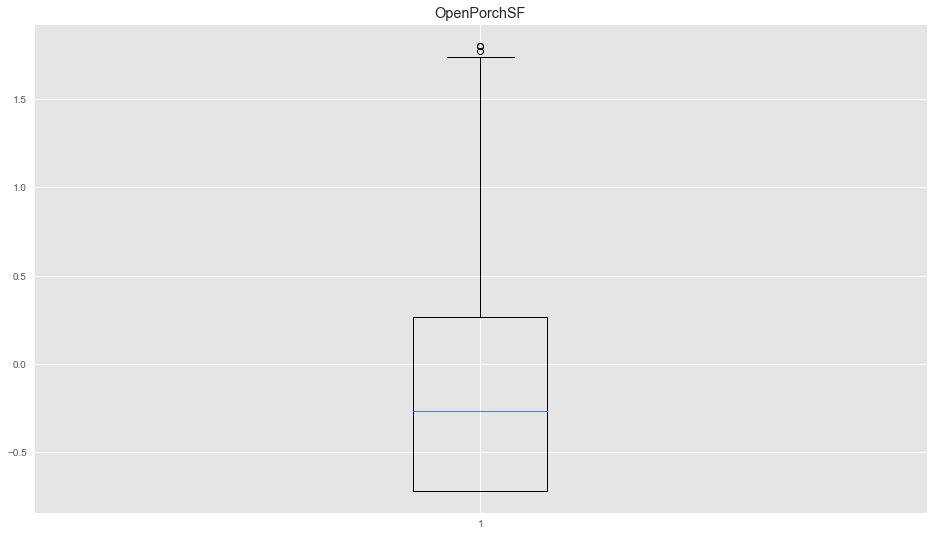

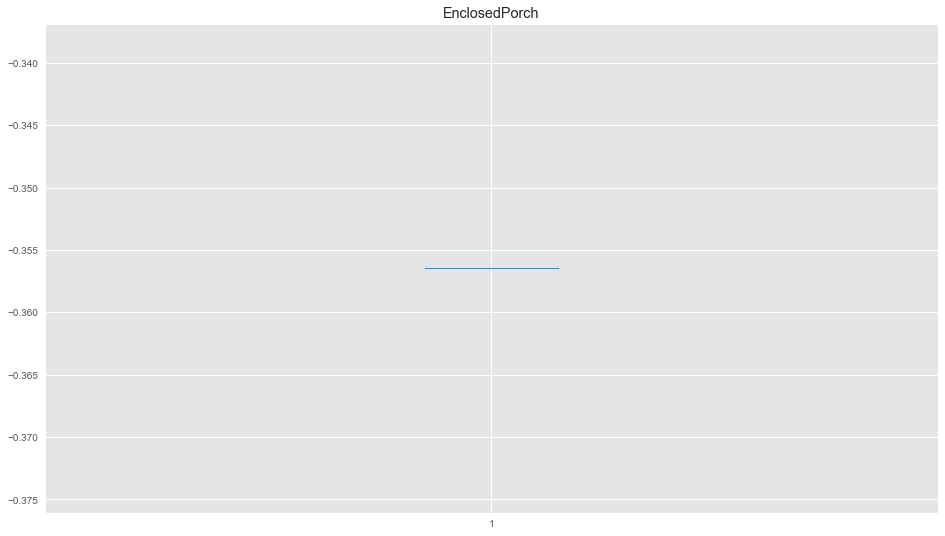

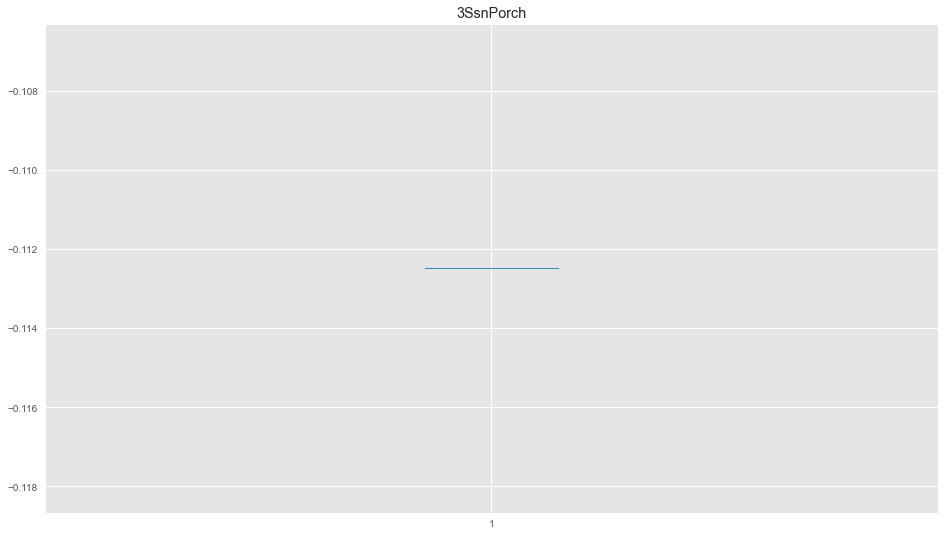

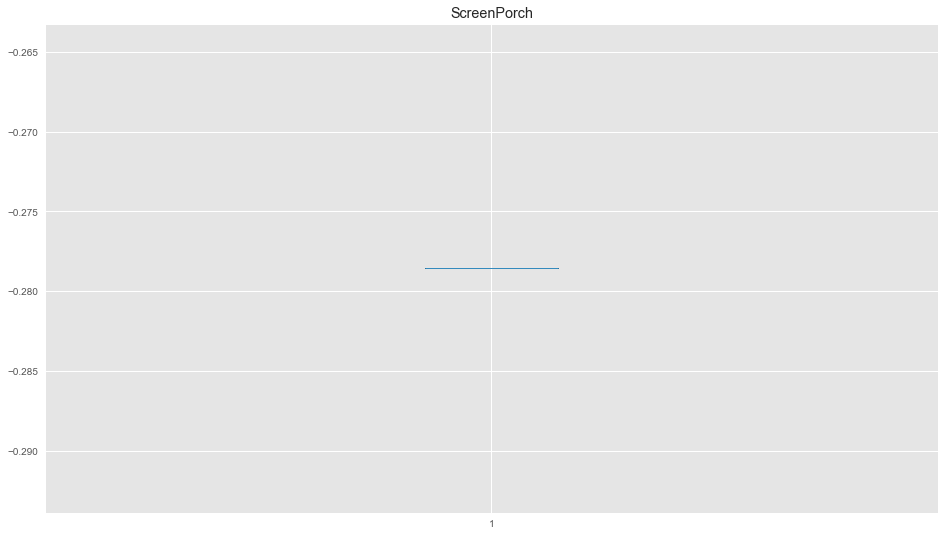

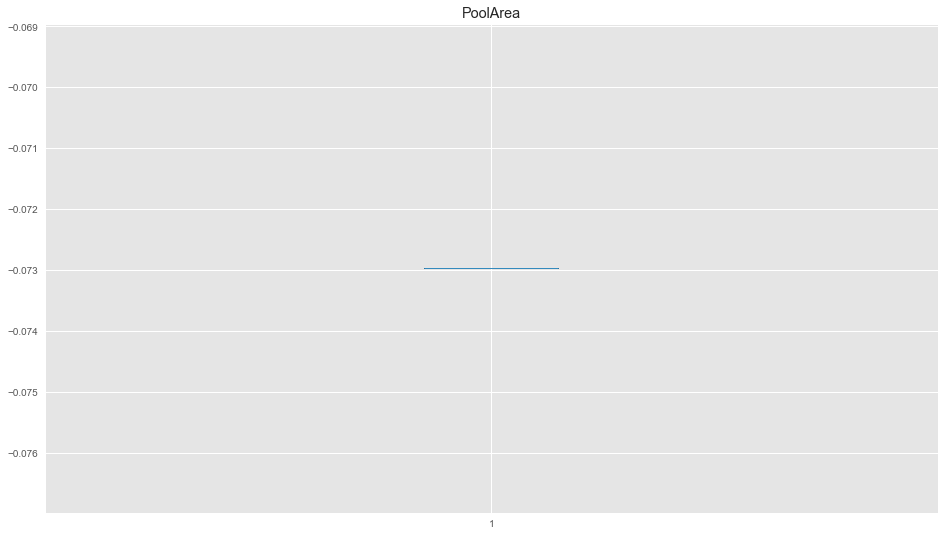

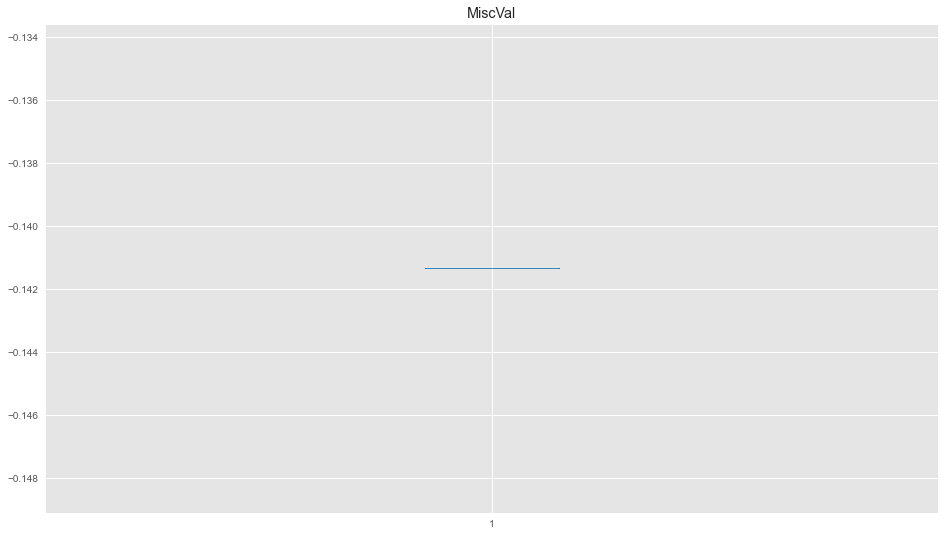

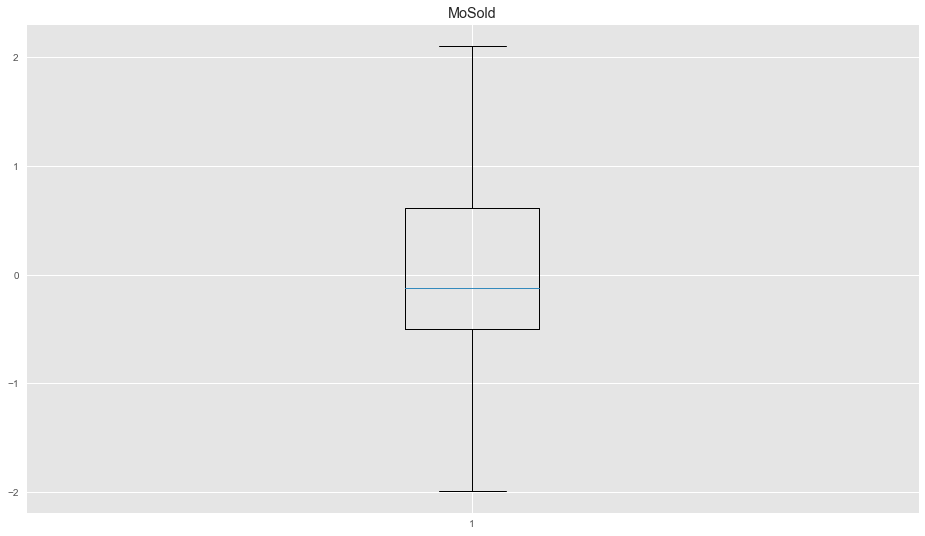

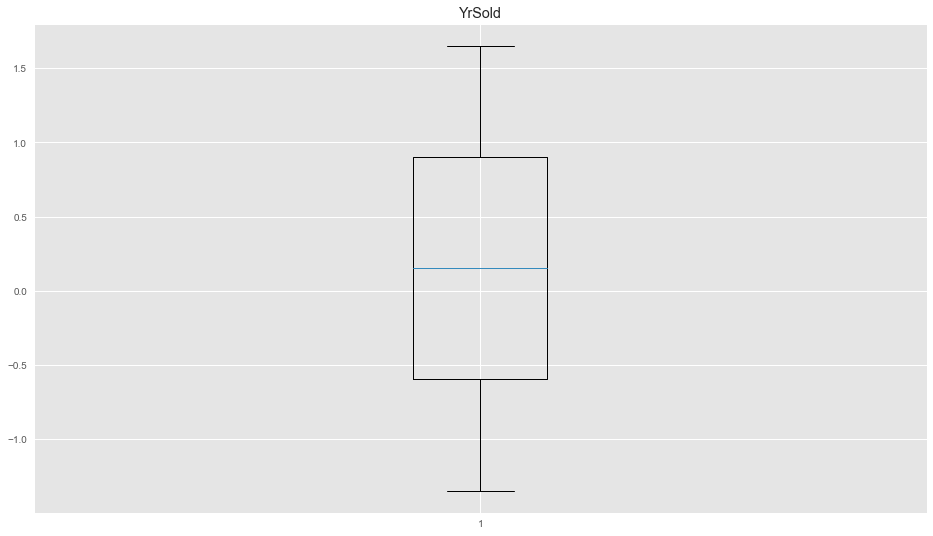

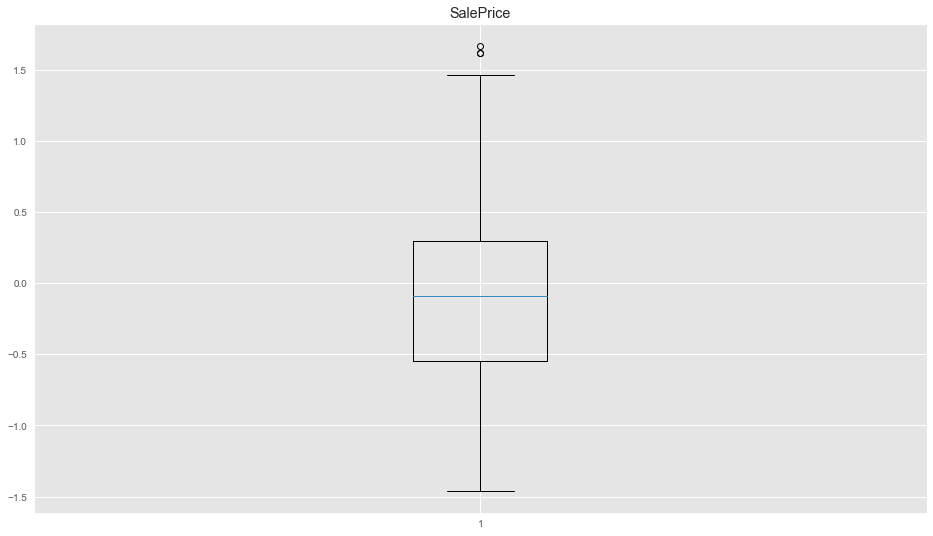

In [8]:
columns = []
for col in entrenamiento.columns:
    columns.append(col)
    
for columna in columns:
    Q1 = entrenamiento[columna].quantile(0.25)
    Q3 = entrenamiento[columna].quantile(0.75)
    IQR = Q3 - Q1

    indexes = entrenamiento[entrenamiento[columna] < (Q1 - 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)

    indexes = entrenamiento[entrenamiento[columna] > (Q3 + 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)
    
    plt.boxplot(entrenamiento[columna])
    plt.title(columna)
    plt.show()

### Muestra Representativa de los Datos

In [9]:
sample = entrenamiento.copy()

sample["combined"] = list(
    zip(
        sample["MSSubClass"],
        sample["LotFrontage"],
        sample["LotArea"],
        sample["OverallQual"],
        sample["OverallCond"],
        sample["YearBuilt"],
        sample["YearRemodAdd"],
        sample["MasVnrArea"],
        sample["BsmtFinSF1"],
        sample["BsmtFinSF2"],
        sample["BsmtUnfSF"],
        sample["TotalBsmtSF"],
        sample["1stFlrSF"],
        sample["2ndFlrSF"],
        sample["LowQualFinSF"],
        sample["GrLivArea"],
        sample["BsmtFullBath"],
        sample["BsmtHalfBath"],
        sample["FullBath"],
        sample["HalfBath"],
        sample["BedroomAbvGr"],
        sample["KitchenAbvGr"],
        sample["TotRmsAbvGrd"],
        sample["Fireplaces"],
        sample["GarageYrBlt"],
        sample["GarageCars"],
        sample["GarageArea"],
        sample["WoodDeckSF"],
        sample["OpenPorchSF"],
        sample["EnclosedPorch"],
        sample["3SsnPorch"],
        sample["ScreenPorch"],
        sample["PoolArea"],
        sample["MiscVal"],
        sample["MoSold"],
        sample["YrSold"],
        sample["SalePrice"]
    )
)

combined_weight = sample['combined'].value_counts(normalize=True)

sample['combined_weight'] = sample['combined'].apply(lambda x: combined_weight[x])

sample = sample.sample(65, weights=sample['combined_weight'])
sample = sample.drop(["combined_weight"], axis=1)

sample.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,6.500000e+01,6.500000e+01,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,-0.200539,-0.156121,-0.119874,0.158209,-0.222825,0.486252,0.301154,-0.184429,-0.069731,-0.282519,...,0.002820,0.038834,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,0.136844,-0.088982,-0.008540
std,0.661727,0.494476,0.286451,0.735092,0.599130,0.767821,0.932952,0.602796,0.840856,0.000000,...,0.854028,0.706074,5.594315e-17,1.398579e-17,0.000000,0.000000,0.000000,1.051730,1.060193,0.536373
min,-0.865309,-1.304888,-0.853819,-1.602169,-0.525264,-1.526264,-1.697107,-0.572493,-0.935981,-0.282519,...,-0.759918,-0.716419,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,-1.986668,-1.345064,-1.433824
25%,-0.865309,-0.439509,-0.270744,-0.153757,-0.525264,-0.008555,-0.032499,-0.572493,-0.935981,-0.282519,...,-0.759918,-0.716419,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,-0.498492,-1.345064,-0.403693
50%,-0.147137,-0.109840,-0.146133,0.570450,-0.525264,0.927903,0.776025,-0.572493,-0.060633,-0.282519,...,0.019610,-0.095205,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,0.245595,0.153015,-0.006098
75%,0.092254,0.096202,0.065079,0.570450,-0.525264,1.057070,0.966266,0.060749,0.571326,-0.282519,...,0.626821,0.448358,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,0.617639,0.902055,0.354146
max,1.528599,0.879165,0.647170,1.294656,1.346981,1.186237,1.108947,1.490821,1.912103,-0.282519,...,1.988944,1.690786,-3.564628e-01,-1.124793e-01,-0.278552,-0.072967,-0.141344,2.105815,1.651095,1.258975


### Correlacion de variables

#### Original

<AxesSubplot:>

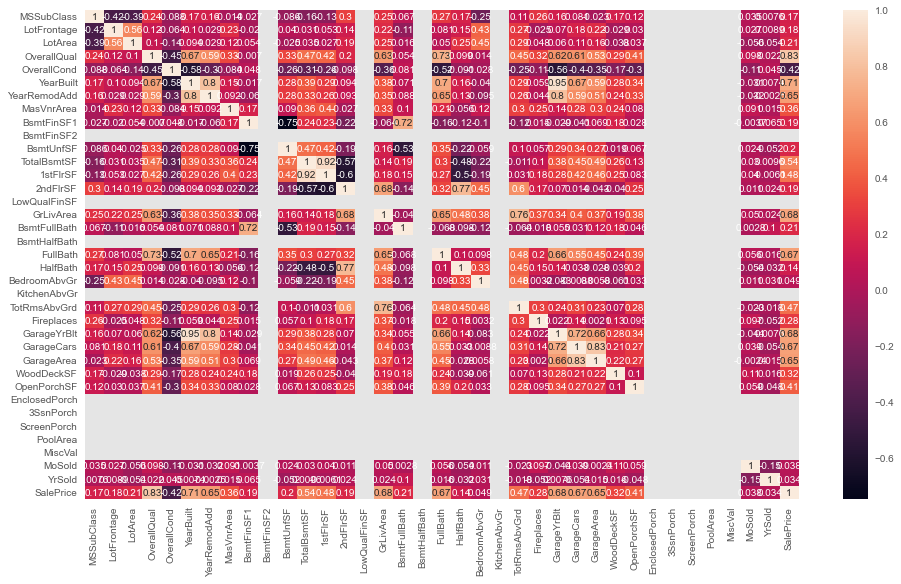

In [10]:
correlacion = entrenamiento.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

#### Muestra

<AxesSubplot:>

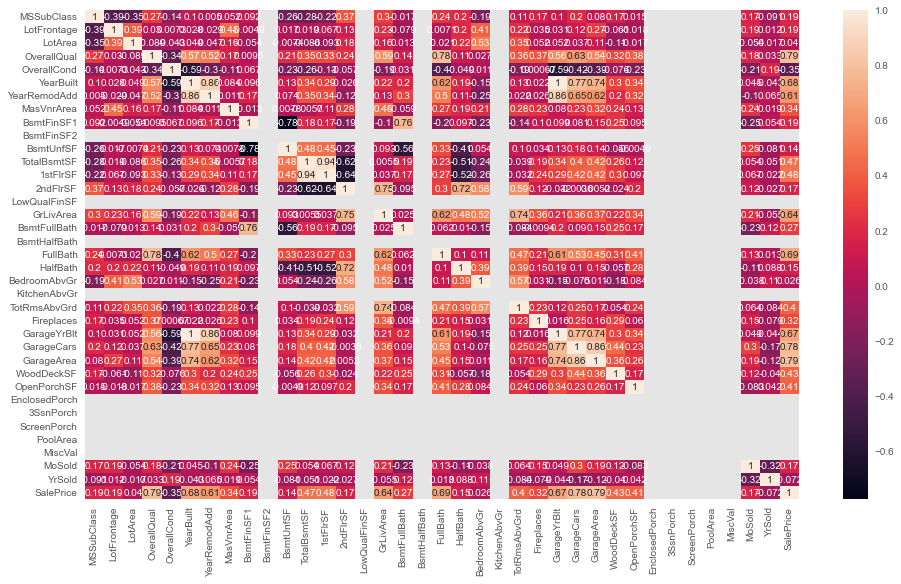

In [11]:
correlacion = sample.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

In [12]:
kmeans = cluster.KMeans(n_clusters = 3)
X = np.array(entrenamiento[["SalePrice", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea"]])
X = sklearn.preprocessing.scale(X)
kmeans.fit(X)
entrenamiento['KmeansCluster'] = kmeans.labels_

In [13]:
entrenamiento['Quality-Price'] = entrenamiento['OverallQual'] / entrenamiento['SalePrice']
entrenamiento['Quality-Price'] = entrenamiento['Quality-Price'] / max(entrenamiento['Quality-Price'])
entrenamiento

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,KmeansCluster,Quality-Price
0,0.092254,-0.233466,-0.205793,0.570450,-0.525264,0.992487,0.823585,0.461803,0.571326,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-1.614624,0.153015,0.277037,2,0.014954
2,0.092254,-0.109840,0.138640,0.570450,-0.525264,0.927903,0.776025,0.282384,0.101627,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,0.989683,0.153015,0.457762,2,0.009050
6,-0.865309,0.178619,-0.004792,1.294656,-0.525264,1.024778,0.918706,0.409032,1.986828,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,0.617639,-0.596024,1.463796,0,0.006423
10,-0.865309,-0.027423,0.132489,-0.877963,-0.525264,-0.234597,-0.983703,-0.572493,0.998325,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-1.614624,0.153015,-0.674780,1,0.009449
13,-0.865309,0.837956,0.065079,0.570450,-0.525264,1.089362,1.013826,1.042275,-0.935981,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,0.617639,-0.596024,1.132467,0,0.003658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.092254,0.384662,-0.015125,1.294656,-0.525264,0.734153,0.490664,1.738841,1.367679,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,2.105815,-0.596024,0.656559,0,0.014320
1448,-0.147137,-0.027423,0.202237,-1.602169,1.346981,-2.010640,0.680905,-0.572493,-0.935981,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-0.498492,-0.596024,-0.885625,1,0.013138
1451,-0.865309,0.302245,-0.105908,1.294656,-0.525264,1.153945,1.108947,0.451249,-0.935981,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,-0.498492,0.902055,1.223914,0,0.007682
1454,-0.865309,-0.357092,-0.322655,0.570450,-0.525264,1.024778,0.918706,-0.572493,-0.060633,-0.282519,...,-0.356463,-0.112479,-0.278552,-0.072967,-0.141344,1.361727,0.902055,-0.006098,0,-0.679336


## Modelo de regresion Logística

### Variable  Dicotómica  

In [177]:
entrenamiento["CARA"] = np.where(entrenamiento["KmeansCluster"] == 2, 1, 0)
entrenamiento["MEDIA"] = np.where(entrenamiento["KmeansCluster"] == 1, 1, 0)
entrenamiento["ECONOMICA"] = np.where(entrenamiento["KmeansCluster"] == 0, 1, 0)
entrenamiento

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,KmeansCluster,Quality-Price,MEDIA,ECONOMICA,CARA
0,0.092254,-0.233466,-0.205793,0.570450,-0.525264,0.992487,0.823585,0.461803,0.571326,-0.282519,...,-0.072967,-0.141344,-1.614624,0.153015,0.277037,2,0.014954,0,0,1
2,0.092254,-0.109840,0.138640,0.570450,-0.525264,0.927903,0.776025,0.282384,0.101627,-0.282519,...,-0.072967,-0.141344,0.989683,0.153015,0.457762,2,0.009050,0,0,1
6,-0.865309,0.178619,-0.004792,1.294656,-0.525264,1.024778,0.918706,0.409032,1.986828,-0.282519,...,-0.072967,-0.141344,0.617639,-0.596024,1.463796,0,0.006423,0,1,0
10,-0.865309,-0.027423,0.132489,-0.877963,-0.525264,-0.234597,-0.983703,-0.572493,0.998325,-0.282519,...,-0.072967,-0.141344,-1.614624,0.153015,-0.674780,1,0.009449,1,0,0
13,-0.865309,0.837956,0.065079,0.570450,-0.525264,1.089362,1.013826,1.042275,-0.935981,-0.282519,...,-0.072967,-0.141344,0.617639,-0.596024,1.132467,0,0.003658,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.092254,0.384662,-0.015125,1.294656,-0.525264,0.734153,0.490664,1.738841,1.367679,-0.282519,...,-0.072967,-0.141344,2.105815,-0.596024,0.656559,0,0.014320,0,1,0
1448,-0.147137,-0.027423,0.202237,-1.602169,1.346981,-2.010640,0.680905,-0.572493,-0.935981,-0.282519,...,-0.072967,-0.141344,-0.498492,-0.596024,-0.885625,1,0.013138,1,0,0
1451,-0.865309,0.302245,-0.105908,1.294656,-0.525264,1.153945,1.108947,0.451249,-0.935981,-0.282519,...,-0.072967,-0.141344,-0.498492,0.902055,1.223914,0,0.007682,0,1,0
1454,-0.865309,-0.357092,-0.322655,0.570450,-0.525264,1.024778,0.918706,-0.572493,-0.060633,-0.282519,...,-0.072967,-0.141344,1.361727,0.902055,-0.006098,0,-0.679336,0,1,0


## CASA PERTENECE A CARA

### Variables independientes y variable dependiente

In [185]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = entrenamiento.pop("CARA")

### Test y entrenamiento inicial

In [193]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [194]:
logReg = LogisticRegression(penalty='none')
logReg.fit(X_train,y_train)

LogisticRegression(penalty='none')

In [195]:
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]

#### 4) Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan  al  modelo,  por  su  valor  de  significación.  Haga  un  análisis  de  correlación  de  las variables del modelo y especifique si el modelo se adapta bien a los datos. Explique si hay sobreajuste (overfitting) o no.

##### Revisar si existe multicolinealidad en las variables

<AxesSubplot:>

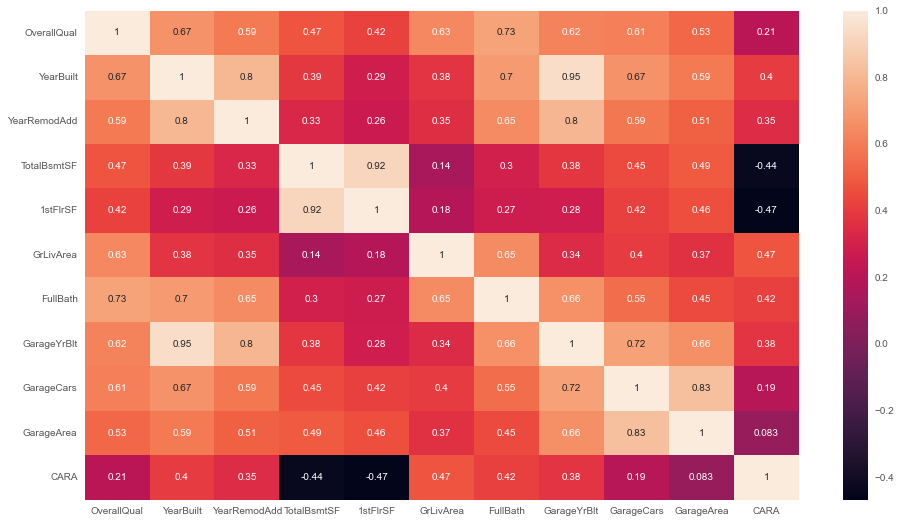

In [189]:
entrenamiento["CARA"] = y

Cor_DI = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea", "CARA"]]
correlacion = Cor_DI.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

Como se puede ver en la matriz de correlacion de variables, las variables TotalBsmtSF y 1stFlrSF no aportan a la decision si una casa es cara o no. Lo mismo se podría decir de GarageArea que tiene un valor muy cercano a 0. Y las variables GarageCars y OverallQual no afectan mucho a dicha desicion.

##### Si existe Overfitting o no

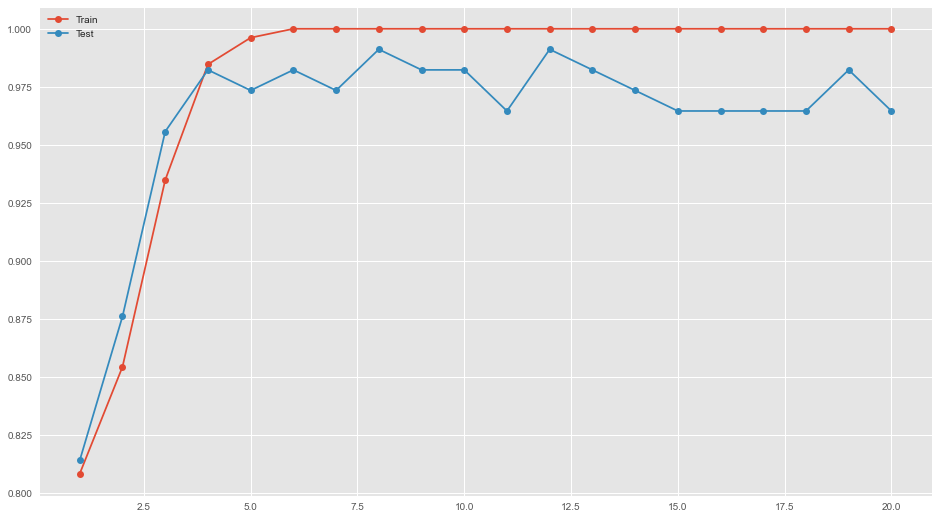

In [196]:
# https://machinelearningmastery.com/overfitting-machine-learning-models/

# define lists to collect scores
train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Como se puede ver en la grafica, durante los primeros 4 puntos los modelos de entrenamiento y prueba estaban muy cercanos por lo que existía overfitting pero a partir del 5° ya no estaban tan juntos (excepto por algunos puntos donde se acercaron mas pero no tanto). 

#### 5) Utilice  el  modelo  con  el  conjunto  de  prueba  y  determine  la  eficiencia  del  algoritmo  para clasificar o predecir, en dependencia de las características de la variable respuesta. 

In [197]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 score: ',f1)
print('Score: ', logReg.score(X_test,y_test))

Accuracy:  0.9646017699115044
Precision:  0.9646017699115044
Recall:  0.9646017699115044
F1 score:  0.9646017699115044
Score:  0.9646017699115044


#### 6) Haga  un  análisis  de  la  eficiencia  del  algoritmo  usando  una  matriz  de  confusión.  Tenga  en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores.

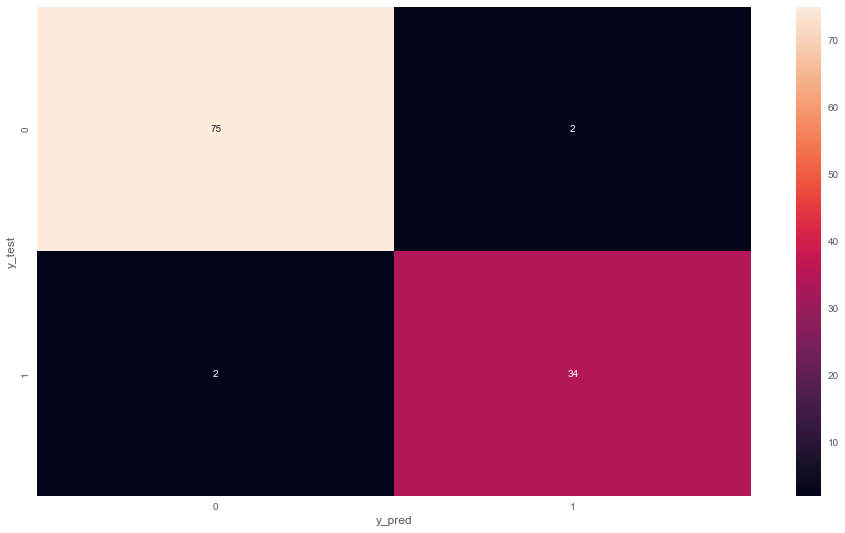

In [198]:
dat = {
    'y_test': y_test,
    'y_pred': y_pred
}

ev = pd.DataFrame(dat, columns=['y_test','y_pred'])

confusion_matrix = pd.crosstab(ev['y_test'], ev['y_pred'], rownames=['y_test'], colnames=['y_pred'])

sb.heatmap(confusion_matrix, annot=True)
plt.show()

Como se puede ver en la matriz de confusion, tanto como por el cuadrante de Falso-Positivo y Falso-Negativo se obtuvieron 2 resultados en cada uno, dando 4 resultados erroneos provocando que el modelo tenga un 96.46% de acierto en tomas la decision si una cada será cara o no.

## CASA PERTENECE A MEDIA

### Variables independientes y variable dependiente

In [199]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = entrenamiento.pop("MEDIA")

### Test y entrenamiento inicial

In [200]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [201]:
logReg = LogisticRegression(penalty='none')
logReg.fit(X_train,y_train)

LogisticRegression(penalty='none')

In [202]:
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]

#### 4) Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan  al  modelo,  por  su  valor  de  significación.  Haga  un  análisis  de  correlación  de  las variables del modelo y especifique si el modelo se adapta bien a los datos. Explique si hay sobreajuste (overfitting) o no.

##### Revisar si existe multicolinealidad en las variables

<AxesSubplot:>

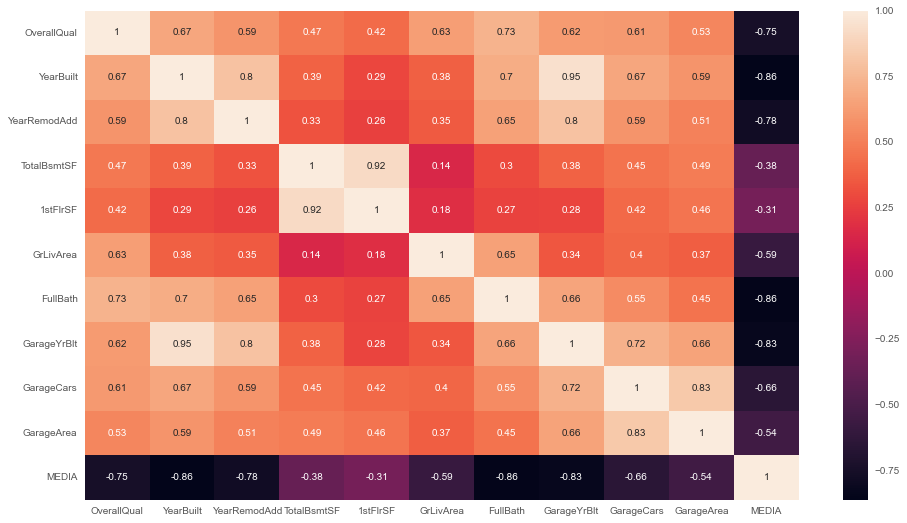

In [203]:
entrenamiento["MEDIA"] = y

Cor_DI = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea", "MEDIA"]]
correlacion = Cor_DI.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

Como se puede ver en la matriz de correlacion, ninguna variable está relacionada a la decision si una casa es intermedia o no y puede tener sentido dado a que es el punto intermedio de decision entonces no hay tanto que tomar en cuenta.

##### Si existe Overfitting o no

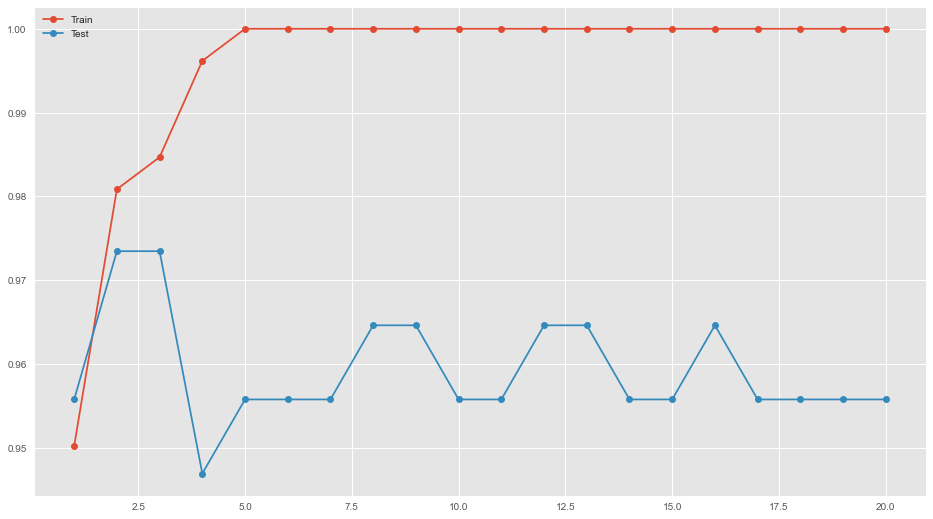

In [206]:
# https://machinelearningmastery.com/overfitting-machine-learning-models/

# define lists to collect scores
train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

Durante los primeros dos puntos se ve que existe overfitting, pero a partir del 4° punto se ve que ya empiezan a separarse demasiado.

#### 5) Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar o predecir, en dependencia de las características de la variable respuesta.

In [207]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 score: ',f1)
print('Score: ', logReg.score(X_test,y_test))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0
Score:  1.0


#### 6) Haga  un  análisis  de  la  eficiencia  del  algoritmo  usando  una  matriz  de  confusión.  Tenga  en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores.

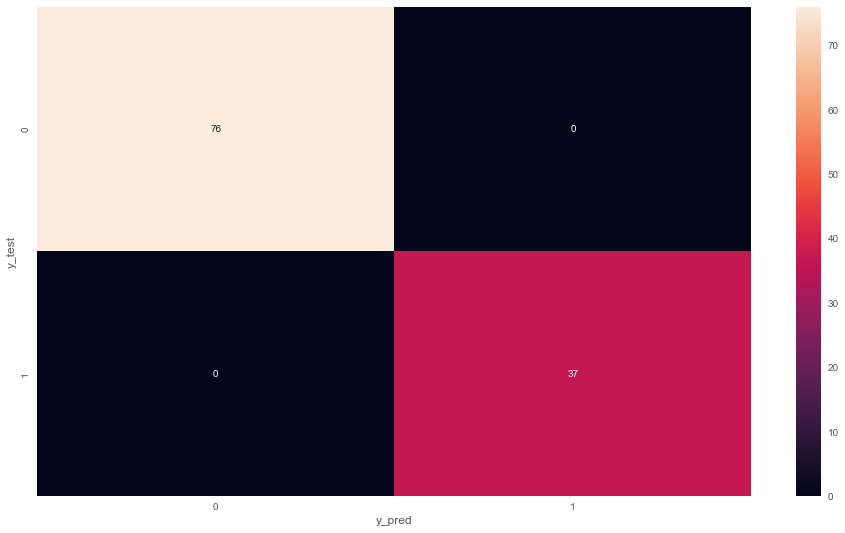

In [208]:
dat = {
    'y_test': y_test,
    'y_pred': y_pred
}

ev = pd.DataFrame(dat, columns=['y_test','y_pred'])

confusion_matrix = pd.crosstab(ev['y_test'], ev['y_pred'], rownames=['y_test'], colnames=['y_pred'])

sb.heatmap(confusion_matrix, annot=True)
plt.show()

Se puede observar en la matriz de confusion que no existen falsos-positivos o falsos-negaivos dando a entender que el modelo predice con exactitud si una casa es intermedia o no.

## CASA PERTENECE A ECONOMICA

### Variables independientes y variable dependiente

In [209]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = entrenamiento.pop("ECONOMICA")

### Test y entrenamiento inicial

In [210]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [211]:
logReg = LogisticRegression(penalty='none')
logReg.fit(X_train,y_train)

LogisticRegression(penalty='none')

In [212]:
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]

#### 4) Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan  al  modelo,  por  su  valor  de  significación.  Haga  un  análisis  de  correlación  de  las variables del modelo y especifique si el modelo se adapta bien a los datos. Explique si hay sobreajuste (overfitting) o no.

##### Revisar si existe multicolinealidad en las variables

<AxesSubplot:>

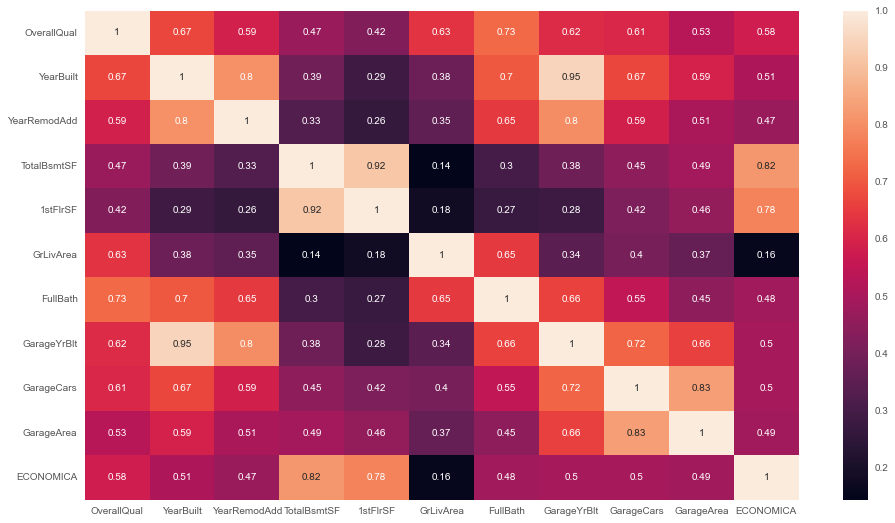

In [213]:
entrenamiento["ECONOMICA"] = y

Cor_DI = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea", "ECONOMICA"]]
correlacion = Cor_DI.corr()
fig, axis = plt.subplots()
sb.heatmap(correlacion, xticklabels=correlacion.columns, yticklabels=correlacion.columns, annot=True, ax=axis)

##### Si existe Overfitting o no

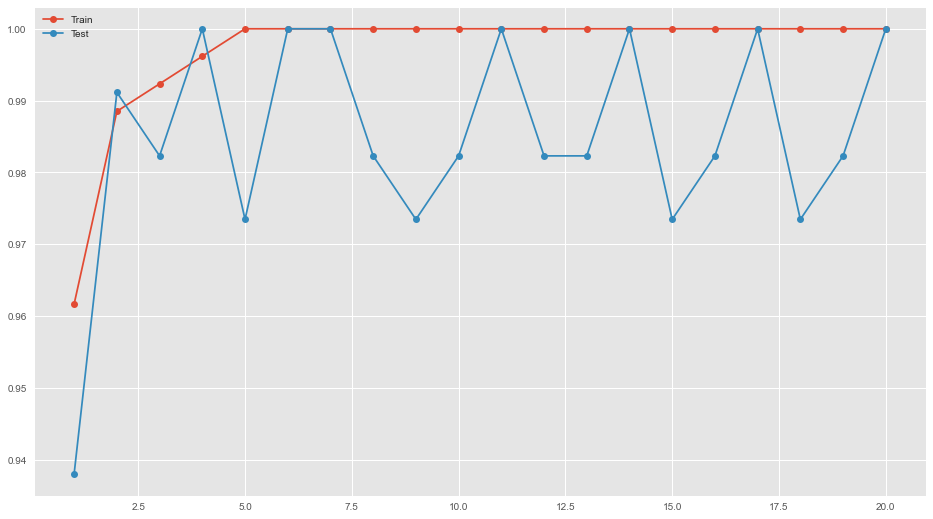

In [217]:
# https://machinelearningmastery.com/overfitting-machine-learning-models/

# define lists to collect scores
train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

#### 5) Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar o predecir, en dependencia de las características de la variable respuesta.

In [214]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 score: ',f1)
print('Score: ', logReg.score(X_test,y_test))

Accuracy:  0.9911504424778761
Precision:  0.9911504424778761
Recall:  0.9911504424778761
F1 score:  0.9911504424778761
Score:  0.9911504424778761


#### 6) Haga  un  análisis  de  la  eficiencia  del  algoritmo  usando  una  matriz  de  confusión.  Tenga  en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores.

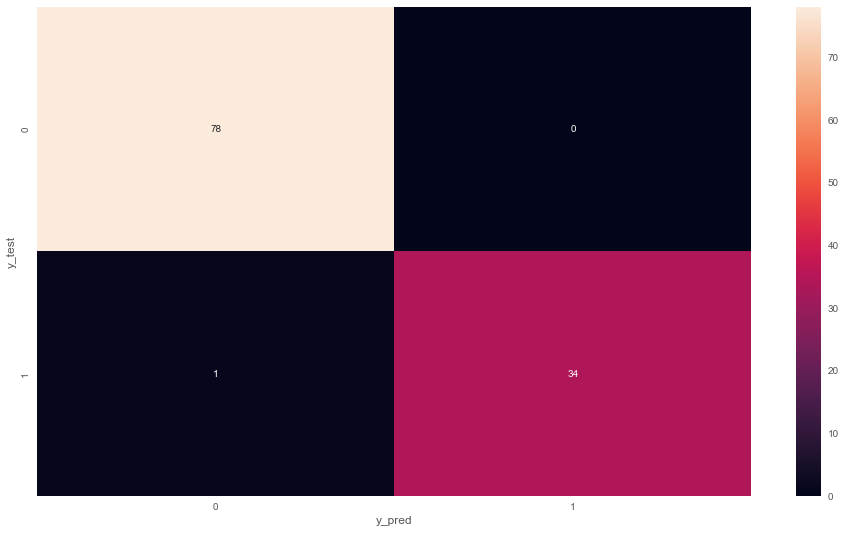

In [215]:
dat = {
    'y_test': y_test,
    'y_pred': y_pred
}

ev = pd.DataFrame(dat, columns=['y_test','y_pred'])

confusion_matrix = pd.crosstab(ev['y_test'], ev['y_pred'], rownames=['y_test'], colnames=['y_pred'])

sb.heatmap(confusion_matrix, annot=True)
plt.show()

### 8. Compare la eficiencia de los 3 modelos que creó (uno para barata, otro para media y otro para  cara)  ¿Cuál  se  demoró  más  en  procesar?¿Cuál  se  equivocó  más?¿Cuál  se  equivocó menos?¿por qué?